<a href="https://colab.research.google.com/github/leonamrayol/opencl/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICAÇÃO DE DÍGITOS USANDO PERCEPTRON MULTI-CAMADAS EM KERAS

Vamos trabalhar nesse notebook o treinamento e uso de uma IA para classificação de dígitos de 0 a 9 em imagens de 8x8 (2^6) da base de dados [*digits*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) do siki-learn que é a biblioteca [*Optical Recognition of Handwritten Digits Data Set*](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) do UCI Dataset utilizando também a biblioteca matplotlib e pandas para análise de dados.

**O TRABALHO FOI FEITO SEGUINDO O ROTEIRO COLAB DE [*Douglas De Rizzo Meneghetti*](https://colab.research.google.com/drive/13r1TY_BF1AXOMH8ufDEct3E8g243sONM#scrollTo=xzhta7yJfc1d)**

*PELOS ALUNOS:*

**LEONAM FELISMINO RAIOL** *E*
**ADRIEL HENRIQUE DOS SANTOS NOVAIS**

PARA MELHOR VISUALIZAÇÃO DO TRABALHO RECOMENDAMOS ACESSAR O ARQUIVO NO [*COLAB*](https://colab.research.google.com/drive/1qUQS1Kh7Bevg7N7nj9HtW3LVSkUsd129?authuser=4#scrollTo=YFCd2eW0KxWa)

Vamos importar as bibliotecas:

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#SOBRE A BASE DE DADOS

A base de dados [*Optical Recognition of Handwritten Digits Data Set*](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) contém 1797 dígitos cada um composto por uma matriz de 64 valores que  compõem a imagem 8X8 que forma o dígito:

In [ ]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


#OS DÍGITOS:
Como podemos ver cada imagem é na verdade uma matriz com valores de 0 a 16 dizendo a intensidade do contraste em cada região que vai de totalmente preto até totalmente branco formando assim o dígito:

<Figure size 432x288 with 0 Axes>

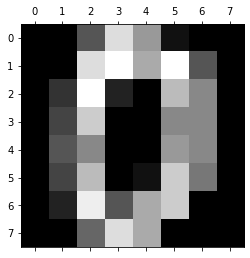

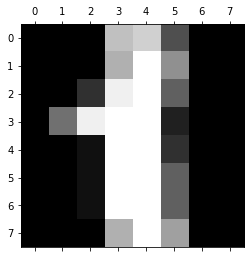

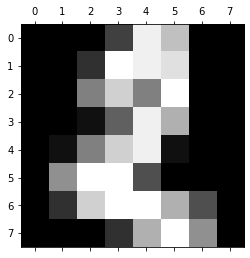

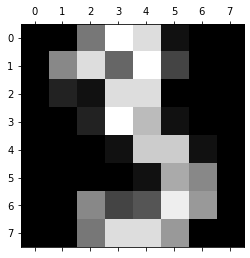

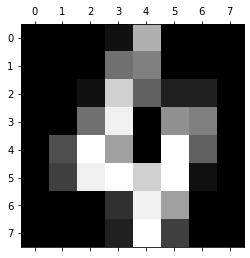

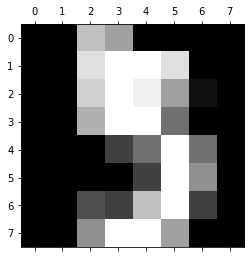

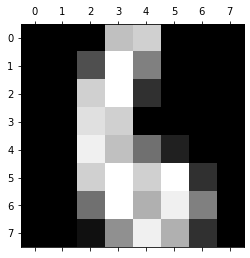

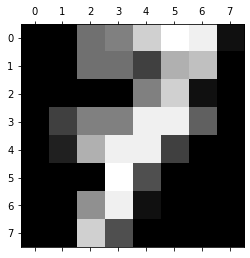

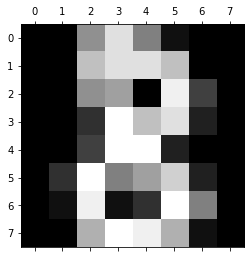

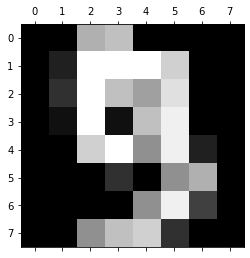

In [ ]:
plt.gray()
for i in range(10):
  plt.matshow(digits.images[i])
plt.show()

#A MATRIZ

Podemos ver as matrizes que forma os dígitos:

In [ ]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


#ETIQUETA DOS DÍGITOS
O target diz qual é o dígito de 0 a 9 que a matriz representa

In [ ]:
print(digits.target)

[0 1 2 ... 8 9 8]


Analisando pelo Pandas

In [ ]:
df = pd.DataFrame(digits.data)
print(df)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

Adicionando a etiqueta as matrizes pra melhor visualizar:

In [ ]:
df['target'] = digits.target
print(df)

        0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  target  
0     0.0  6.0  13.0  

In [ ]:
print(len(digits.data))

1797


#PREPARANDO OS DADOS
Através do sklearn vamos carregar a base de dados

In [ ]:
x, y = digits.data[:-10], digits.target[:-10]

Aqui vamos dividir quantos dígitos vamos usar para treino e quantos usaremos para teste:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Test size de 0.2 nos dá uma divisão de 80% da base de dados para treino e 20% para teste ficando assim 1429 dígitos em treino e 358 dígitos em teste:

In [ ]:
print(len(x_train))

1429


In [ ]:
print(len(x_test))

358


#UTILIZANDO O [*ONE-HOT ENCODING*](https://en.wikipedia.org/wiki/One-hot)
ASSIM COMO NO ROTEIRO utilizaremos o [*one-hot encoding*](https://en.wikipedia.org/wiki/One-hot) para auxiliar a rede na precisão de saida das classes.

In [ ]:
y_train_onehot = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes = 10)

print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

print("\n### Depois ###")
print(y_train_onehot[:5])
print(y_test_onehot[:5])

### Antes ###
[9 4 1 5 1]
[2 9 1 3 1]

### Depois ###
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#TOPOLOGIA DA REDE NEURAL
Assim como no roteiro utilizaremos um rede neural para clasificar o dígito proposto entre 0 a 9. A rede neural irá nos dizer qual classe (dentre as 10) o a Matriz de 64 pertence.

Após construir a rede neural, utilizamos uma função utilitária do Keras para exibir a topologia do modelo. Neste caso, a rede receberá como entrada vetores de tamanho 64 (correspondente àos dados da Matriz que compõem o dígino) e utilizará 4 camadas densas para realizar a classificação.

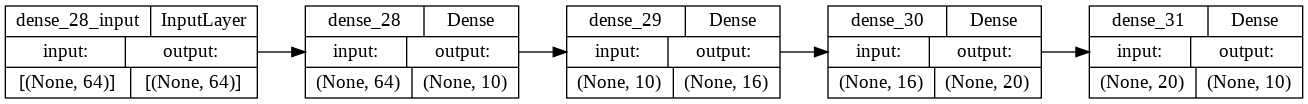

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, activation='tanh', input_dim=64))
  model.add(Dense(16,activation='tanh'))
  model.add(Dense(20,activation='tanh'))
  model.add(Dense(10,activation='softmax'))
  model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model=create_model()

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

Utilizando a função utilitária do Keras podemos ver a topologia do modelo composto por  4 camadas densas para realizar a classificação sendo a regra pra escolha de neurônios em cada camada a seguinte 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída.

#TREINANDO A REDE

A rede aprenderá a realizar a classificação dos dados de treinamento (`X_train`) para as classes categorizadas (`y_train_onehot`) por um número de épocas que aqui determinaremos em 500.

Após o treinamento acessaremos a variável denominada `history` para podermos expor gráficamente depois para análise.


In [ ]:
history = model.fit(x_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
41/41 - 1s - loss: 2.2551 - categorical_accuracy: 0.1827 - val_loss: 2.1031 - val_categorical_accuracy: 0.2867 - 698ms/epoch - 17ms/step
Epoch 2/500
41/41 - 0s - loss: 1.9637 - categorical_accuracy: 0.4222 - val_loss: 1.8544 - val_categorical_accuracy: 0.4266 - 103ms/epoch - 3ms/step
Epoch 3/500
41/41 - 0s - loss: 1.6909 - categorical_accuracy: 0.5350 - val_loss: 1.5813 - val_categorical_accuracy: 0.5455 - 92ms/epoch - 2ms/step
Epoch 4/500
41/41 - 0s - loss: 1.4249 - categorical_accuracy: 0.6229 - val_loss: 1.3398 - val_categorical_accuracy: 0.5804 - 88ms/epoch - 2ms/step
Epoch 5/500
41/41 - 0s - loss: 1.2115 - categorical_accuracy: 0.6711 - val_loss: 1.1611 - val_categorical_accuracy: 0.6294 - 93ms/epoch - 2ms/step
Epoch 6/500
41/41 - 0s - loss: 1.0516 - categorical_accuracy: 0.6967 - val_loss: 1.0259 - val_categorical_accuracy: 0.6783 - 91ms/epoch - 2ms/step
Epoch 7/500
41/41 - 0s - loss: 0.9296 - categorical_accuracy: 0.7457 - val_loss: 0.9413 - val_categorical_accuracy:

#ANÁLISE DE ACURÁCIA
Como mencionado vamos agora ver a acurácia ao longo do treinamento da IA

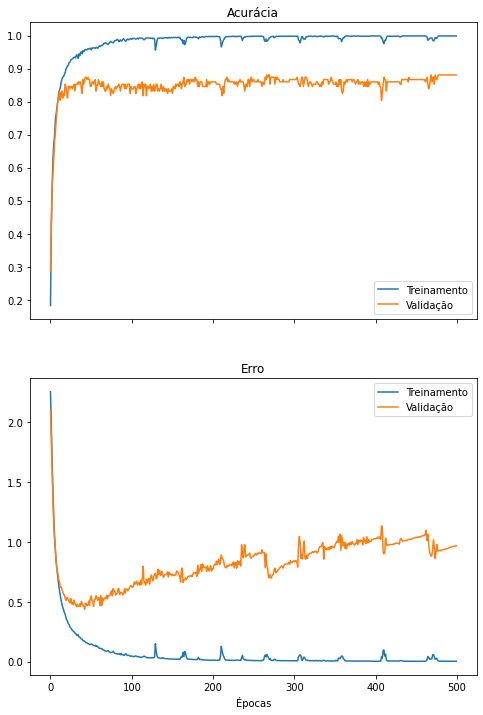

In [ ]:
def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treinamento', 'Validação'])
    axes[1].legend(['Treinamento', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

#ACURÁCIA
Podemos ver que a acurácia na validação não se estabiliza tanto quanto no Íris, aqui ficando sempre abaixo de 0.9, vários fatores podem estar corelacionados como a complexiade em categorizar os dígitos ou a estrutura da rede.

#OVERFITTING
O fenômeno [*overfitting*](https://pt.wikipedia.org/wiki/Sobreajuste) se dá quando uma rede treina demais e se especializa no conjunto prejudicando o desempenho da rede neural, uma vez que, ao se especializar, ela falha em generalizar sua capacidade de classificação para dados não observados.

O overfitting pode ser visualizado quando o erro de classificação no conjunto de treinamento continua a diminuir, ao mesmo tempo em que o erro no conjunto de validação começa a aumentar. Este ponto pode ser considerado um bom momento para encerrar o treinamento da rede neural.



#MITIGANDO A ACURÁCIA E O ERRO
Vamos tentar encerar o modelo mais cedo a fim de evitar o [*overfitting*](https://pt.wikipedia.org/wiki/Sobreajuste) e melhorar a acurácia:

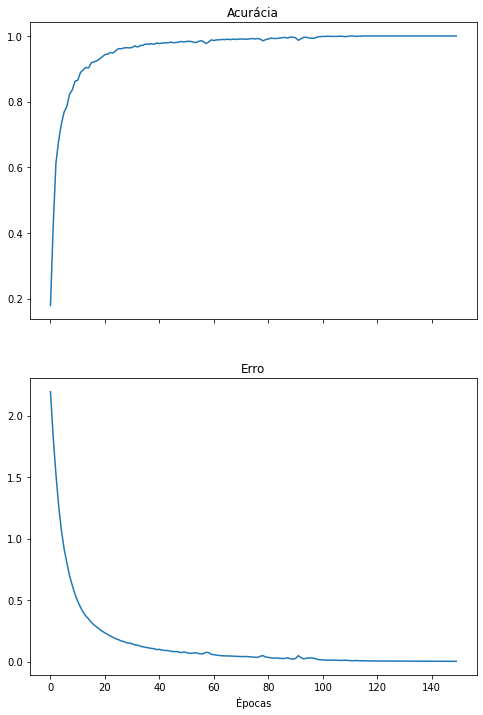

In [ ]:
model = create_model()
history = model.fit(x_train, y_train_onehot, epochs=150, verbose=0)
plot_metrics(history)

#INFERINDO O MODELO
Vamos utilizar a rede treinada para classificar os dados de teste que separamos no início e visualizar as classes preditas pelo modelo. A rede neural classifica todo o conjunto de testes de uma vez.

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

12/12 [==============================] - 0s 3ms/step
[[2.5037521e-05 1.5831159e-06 9.9776489e-01 ... 1.7452746e-06
  1.0970929e-03 2.7939887e-04]
 [5.7513898e-07 2.1567324e-03 2.6187672e-06 ... 4.9389823e-06
  2.1305366e-05 9.9512070e-01]
 [7.4377760e-07 9.9965847e-01 1.0971317e-05 ... 9.2524897e-07
  2.2715198e-05 5.7261419e-05]
 ...
 [2.0327894e-05 7.3193369e-05 3.2410528e-06 ... 2.7234771e-07
  9.9987209e-01 5.3228561e-08]
 [4.4692006e-06 1.6006663e-04 9.9941671e-01 ... 9.3168429e-10
  2.9640328e-04 7.8367302e-06]
 [9.1661044e-05 4.5675813e-07 1.2534983e-08 ... 5.7627447e-04
  5.8172827e-06 2.5986283e-05]]


A saída da rede é um conjunto de 10 valores para cada vetor de entrada. Cada um dos 10 valores indica a relevância da respectiva classe para o vetor de entrada. Quanto maior essa relevância, maiores as chances do dado de entrada pertencer àquela classe.

A função de ativação na última camada da rede neural dita a natureza dos valores de saída:

- `tanh`: tangente hiperbólica (intervalo $[-1; 1]$).
- `sigmoid`: sigmoide (intervalo $[0; 1]$).
- `softmax`: _softmax_ (intervalo $[0; 1]$, a soma dos valores preditos para cada dado de entrada deve ser igual a 1).

Para transformar os valores exibidos acima nas classes preditas, escolhemos a maior saída no eixo das classes.

Compare os valores verdadeiros com os valores preditos pela rede.

In [ ]:
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [2 9 1 3 1 3 8 3 7 2 0 6 5 6 5 1 6 7 0 9 1 2 5 8 7 2 1 6 4 0 5 9 8 3 3 5 9
 1 5 8 2 1 1 4 8 3 6 0 6 0 0 3 7 7 9 8 9 6 7 1 1 6 5 0 6 4 7 5 3 5 0 3 5 9
 6 7 6 6 2 1 4 1 7 6 7 4 0 9 7 2 3 6 6 3 2 0 0 6 5 3 7 1 4 3 3 7 9 7 2 8 9
 2 7 9 0 7 9 3 9 2 7 7 1 4 3 6 8 6 5 0 0 2 2 9 7 4 2 3 7 5 1 9 3 0 1 0 1 1
 2 2 8 5 9 4 0 0 0 9 6 1 3 1 8 6 8 5 0 2 3 8 0 1 1 6 4 9 1 5 9 6 2 5 2 4 1
 3 5 2 8 0 4 8 1 5 1 4 3 4 5 0 2 3 1 9 0 1 8 7 9 3 8 3 2 1 2 5 8 7 5 1 8 4
 8 0 6 0 4 9 5 4 6 9 2 1 6 5 5 9 4 0 4 7 4 8 1 6 8 2 7 1 8 1 9 8 4 2 0 1 7
 8 7 8 4 5 9 3 2 6 7 3 7 7 4 8 5 8 5 5 5 1 4 2 9 0 6 4 2 7 4 1 8 1 9 9 3 8
 6 2 2 8 1 7 9 6 6 9 3 9 8 3 5 4 5 2 6 9 3 9 3 0 9 2 8 1 0 8 6 9 1 5 8 7 4
 8 3 9 7 6 4 8 7 0 6 8 3 2 8 5 0 5 6 5 0 9 9 8 2 5]
Classes preditas:	 [2 9 1 3 1 3 8 3 7 2 0 6 5 6 5 1 6 7 0 9 1 2 5 8 8 2 1 6 4 0 5 1 8 3 3 5 9
 1 5 8 2 1 1 4 9 3 6 0 6 0 0 9 7 7 9 8 9 6 7 1 1 6 5 0 6 4 7 5 3 5 0 3 5 9
 6 7 6 6 2 1 4 1 7 6 7 4 0 9 7 2 3 6 6 3 2 0 0 6 5 3 7 1 4 3 3 7 9 7 2 8 5
 2 7 9 0 7 9

# AVALIAÇÃO DA REDE TREINADA

Utilizamos o *scikit-learn* para produzir relatórios de classificação utilizando os valores reais e os preditos.

As medidas de desempenho da rede são precisão, *recall* (revocação) e F1 [[link]](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o#Defini%C3%A7%C3%A3o_(contexto_de_classifica%C3%A7%C3%A3o)).

A precisão indica a quantidade de classificações positivas que a rede realizou que são realmente positivas. A revocação indica a fração de classificações positivas que a rede realizou, do total de classificações positivas.

Em nosso contexto, podemos imaginar que essas medidas respondem às seguintes perguntas:

- **Precisão:** De todos os dígitos que meu classificador indicou como sendo da classe *1*, quais realmente são dessa classe?

- **Revocação:** De todos os dígitos *1* presentes na minha base de dados, quantas o meu classificador conseguiu identificar?

In [ ]:
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.95      0.98      0.96        41
           2       1.00      1.00      1.00        35
           3       0.89      0.94      0.91        34
           4       0.94      1.00      0.97        29
           5       1.00      0.89      0.94        37
           6       0.97      0.97      0.97        36
           7       0.92      0.97      0.94        34
           8       0.92      0.90      0.91        39
           9       0.95      0.90      0.92        39

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.95      0.95      0.95       358



## Detalhando precisão e revocação

A precisão e a revocação são valores relevantes sobre um modelo, porém suas definições podem ser um pouco confusas. Uma forma um pouco mais informativa de se pensar nestas medidas é utilizando-as na análise da eficácia de um teste médico hipotético (que toma o lugar de nosso modelo classificador) para uma doença e quais questões cada uma das medidas responde:

- **Precisão:** De todos os testes positivos realizados, quantos pacientes realmente possuem a doença?

- **Revocação:** De todos os pacientes que realmente possuem a doença, qual a porcentagem que eu consegui identificar utilizando meu teste?

Caso o teste médico possua alta precisão, temos certeza que todos os pacientes que informarmos como portadores da doença, certamente terão a doença. Ou seja, o teste não estará errado nas classificações positivas que realiza.

Caso o teste possua alta revocação, temos certeza que todos os portadores da doença em nossa população foram identificados.

Porém, algumas situações anômalas podem surgir. Por exemplo, se há 1000 doentes em nossa amostra e nosso classificador realiza apenas 1 classificação positiva e o paciente está realmente doente, a precisão do modelo é de 100%, pois não fez nenhuma classificação positiva errada.

Igualmente, se há 1000 doentes numa população de 1 milhão de pessoas e nosso classificador realiza 1 milhão de classificações positivas, ele possuirá uma revocação de 100%, uma vez que detectou todos os doentes.

Devido a estas anomalias, é sempre preciso ponderar qual medida é mais importante para um classificador em uma determinada tarefa ou, na melhor das hipóteses, treinar um classificador que maximize ambas as medidas.

A medida F-score (ou F-measure ou F1), também exibida acima, é uma combinação da precisão e da revocação e pode auxiliar na avaliação do classificador.

# MÁTRIZ DE CONFUSÃO

A matriz de confusão compara, em números absolutos, as classes reais e preditas. Valores na diagonal principal indicam classificações corretas e qualquer outro valor indica erros de classificação no conjunto de testes.

[[33  0  0  0  0  0  1  0  0  0]
 [ 0 40  0  0  0  0  0  1  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  0  0  0  1  0]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 1  0  0  1  0 33  0  1  0  1]
 [ 0  0  0  1  0  0 35  0  0  0]
 [ 0  0  0  1  0  0  0 33  0  0]
 [ 0  1  0  1  1  0  0  0 35  1]
 [ 0  0  0  0  1  0  0  1  2 35]]




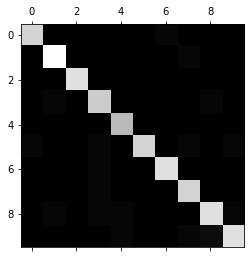

In [ ]:
print(confusion_matrix(y_test, y_pred_onehot))
print('\n')
plt.matshow(confusion_matrix(y_test, y_pred_onehot))
plt.show()

# CONCLUSÃO

Este *colab* apresentou um exemplo de classificação de uma base de dados utilizando redes neurais. Os seguintes conceitos foram apresentados ao longo do *colab*:

1. apresentação da **base de dados Dígits**:
2. separação da base de dados entre conjuntos de **treinamento, validação e testes**;
3. criação de uma rede neural do tipo **perceptron multi-camadas** utilizando Keras;
4. **treinamento da rede neural** no conjunto de treinamento;
5. observação e descrição do fenômeno de ***overfitting*** no conjunto de validação e complexidade de análise;
6. **re-treinamento da rede neural** de forma a prevenir o *overfitting*;
7. **realização de inferenças** em dados nunca obervados antes pela rede neural (o conjunto de testes);
8. avaliação da rede neural utilizando **precisão, revocação, F1-score e a matriz de confusão**.